In [1]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\jeeva P\Downloads\TSLA.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200
1,2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007,83166000
2,2023-08-02,255.570007,259.519989,250.490005,254.110001,254.110001,101752900
3,2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100
4,2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
60,2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
61,2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100
62,2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600
63,2023-10-27,210.600006,212.410004,205.770004,207.300003,207.300003,94728100
64,2023-10-30,209.279999,210.880005,194.669998,197.360001,197.360001,136061800


In [5]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# statioary checking


In [7]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [8]:
# perform adf test

result = adfuller(data['Close'])

In [9]:
# extract and print the test statistic and p-value

adf_statistic = result[0]
p_value = result[1]

print("ADF_statistic:",adf_statistic)
print("p_value:",p_value)

ADF_statistic: -1.521286592700396
p_value: 0.5229561205178622


In [10]:
#extract the stationary based on p-value 

if p_value<= 0.5:
    print("fail to reject the null hypothesis H0, it mean data is stationary")
else:
    print("Reject the null hypothesis H0, it mean data is not stationary")

Reject the null hypothesis H0, it mean data is not stationary


# MODEL CREATION


In [14]:
# CREATE THE ARIMA MODEL 

model = ARIMA(data['Close'],order = (1,0,1))

# fit the model 
result=model.fit()

In [15]:
#summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                   65
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -225.080
Date:                Sat, 18 Nov 2023   AIC                            458.161
Time:                        06:45:09   BIC                            466.859
Sample:                             0   HQIC                           461.593
                                 - 65                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        241.3615     15.813     15.263      0.000     210.368     272.355
ar.L1          0.9438      0.068     13.951      0.000       0.811       1.076
ma.L1          0.0234      0.159      0.147      0.883      -0.289       0.336
sigma2        57.5656      7.803      7.377      0.000      42.271      72.860
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                14.90
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.65
Prob(H) (two-sided):                  0.70   Kurtosis:                         4.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# FUTURE PREDICTION

In [16]:
data['ARMA_forecast'] = result.predict(start = 0, end = len(data)-1)

In [18]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ARMA_forecast
60,2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100,213.693950
61,2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100,217.982319
62,2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600,213.916311
63,2023-10-27,210.600006,212.410004,205.770004,207.300003,207.300003,94728100,207.569868
64,2023-10-30,209.279999,210.880005,194.669998,197.360001,197.360001,136061800,209.208001


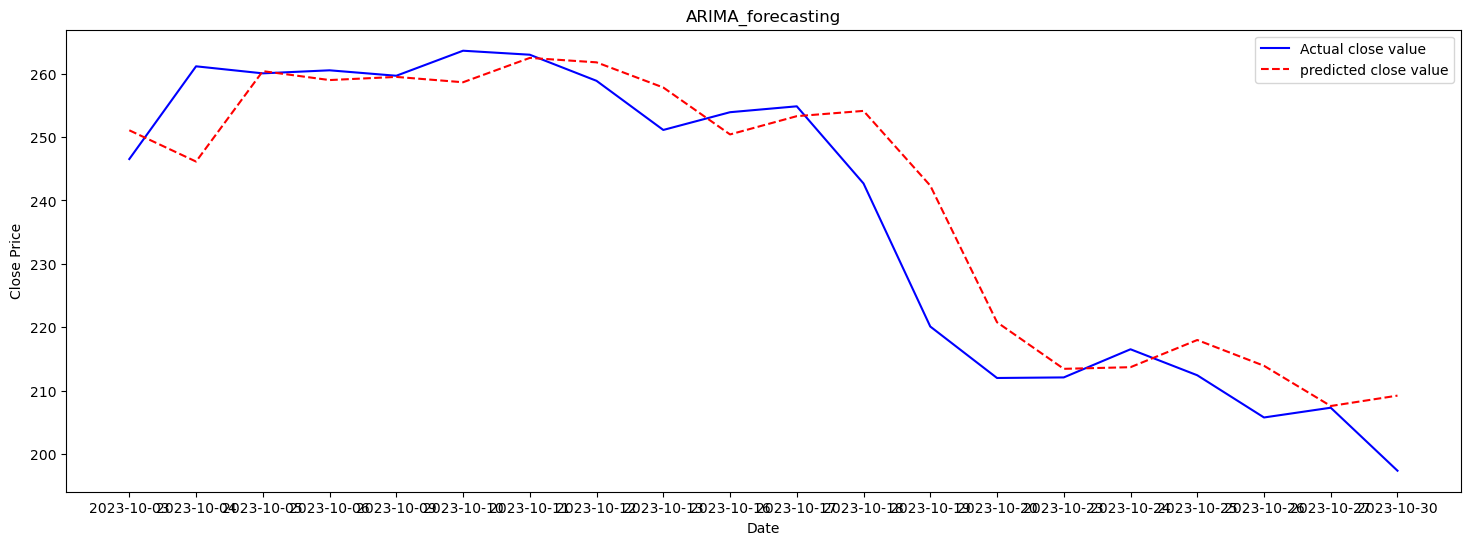

In [25]:
# plot the prediction

x = data['Date'][-20:]
y1 = data['Close'][-20:]
y2 = data["ARMA_forecast"][-20:]

plt.figure(figsize = (18,6))
plt.plot(x,y1, label = 'Actual close value', color = 'blue')
plt.plot(x,y2,'r--',label = 'predicted close value')
plt.title('ARIMA_forecasting')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()